In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

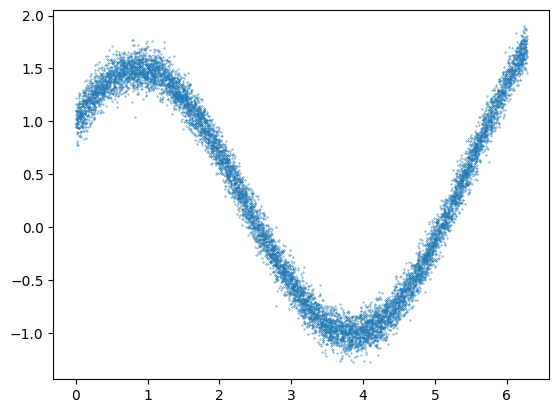

In [56]:
num_points = 10000
X = np.random.uniform(0, 2 * np.pi, num_points)
Y = np.cos(X) + np.sin(X) + np.tan(X / 10)

# add some noise to the data
Y += np.random.normal(0, 0.1, num_points)

plt.scatter(X, Y, s=0.1)
plt.show()

In [57]:
Y = np.array(Y)
X = np.array(X)

X.shape

(10000,)

In [58]:
data = pd.DataFrame({'Y': Y, 'X': X, 'sinx': np.sin(X), 'cosx': np.cos(X), 'X^2': X**2, 'X^3': X**3})
data = np.array(data)

In [59]:
np.random.shuffle(data)

data

array([[-3.74461377e-02,  5.19390061e+00, -8.86295869e-01,
         4.63119458e-01,  2.69766036e+01,  1.40113798e+02],
       [ 1.59321377e+00,  6.42038525e-01,  5.98829291e-01,
         8.00876695e-01,  4.12213467e-01,  2.64656926e-01],
       [-7.60408938e-01,  3.34733453e+00, -2.04293445e-01,
        -9.78909694e-01,  1.12046485e+01,  3.75057066e+01],
       ...,
       [-9.66999074e-01,  4.23118520e+00, -8.86438398e-01,
        -4.62846590e-01,  1.79029282e+01,  7.57506047e+01],
       [ 8.32995423e-01,  1.83998371e+00,  9.63987329e-01,
        -2.65948169e-01,  3.38554004e+00,  6.22933852e+00],
       [-9.16091635e-01,  3.78081447e+00, -5.96571081e-01,
        -8.02560244e-01,  1.42945580e+01,  5.40450719e+01]])

In [60]:
X = data.T[1:6]
Y = data.T[0:1]

In [61]:
X_train = X.T[0:8000].T
Y_train = Y.T[0:8000].T

X_train.shape

(5, 8000)

In [62]:
def init_params():
    W1 = np.random.rand(32, 5) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(32, 32) - 0.5
    b2 = np.random.rand(32, 1) - 0.5
    W3 = np.random.rand(32, 32) - 0.5
    b3 = np.random.rand(32, 1) - 0.5
    W4 = np.random.rand(32, 32) - 0.5
    b4 = np.random.rand(32, 1) - 0.5
    W5 = np.random.rand(1, 32) - 0.5
    b5 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [63]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def tanh(Z):
    return np.tanh(Z)

def tanh_deriv(Z):
    return 1 - np.tanh(Z) ** 2

In [64]:
def forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = ReLU(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = ReLU(Z4)
    Z5 = np.dot(W5, A4) + b5
    A5 = Z5
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5

In [65]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y):
    m = X.shape[1]
    dZ5 = A5 - Y
    dW5 = np.dot(dZ5, A4.T) / m
    db5 = np.sum(dZ5, axis=1, keepdims=True) / m
    dA4 = np.dot(W5.T, dZ5)
    dZ4 = dA4 * ReLU_deriv(Z4)
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * ReLU_deriv(Z3)
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5

In [66]:
def update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    W4 -= alpha * dW4
    b4 -= alpha * db4
    W5 -= alpha * dW5
    b5 -= alpha * db5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [67]:
def mse(A3, Y):
    m = Y.shape[1]
    return np.sum((A3 - Y) ** 2) / m

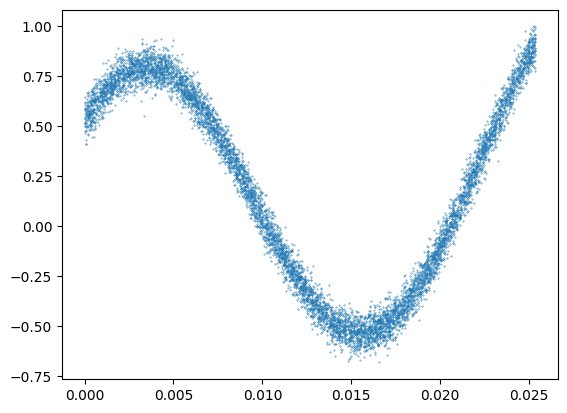

In [68]:
X_train = X_train / np.max(X_train)
Y_train = Y_train / np.max(Y_train)

plt.scatter(X_train[0], Y_train, s=0.1)

In [69]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5 = forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        if i % 10 == 0:
            print("loss: ", mse(A3, Y), "iteration: ", i)
            if i % 200 == 0:
                plt.scatter(X[0], A5, s=0.1, label=f'{i}th iteration', c='r')
                plt.scatter(X[0], Y, c='b', s=0.1)
                plt.show()

        dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha)

    return A5

loss:  11.944857080214728 iteration:  0


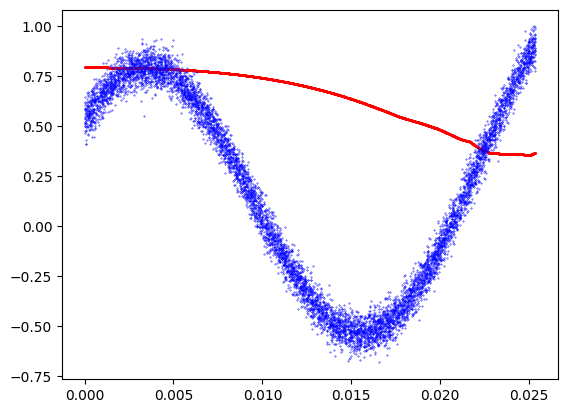

loss:  11.3019723881284 iteration:  10
loss:  11.19282953915021 iteration:  20
loss:  11.124896430372543 iteration:  30
loss:  11.089052264364602 iteration:  40
loss:  11.058856113785469 iteration:  50
loss:  11.027479281292194 iteration:  60
loss:  11.00224830519365 iteration:  70
loss:  11.004348489473703 iteration:  80
loss:  10.983699954254687 iteration:  90
loss:  10.964498051611528 iteration:  100
loss:  10.94985792704996 iteration:  110
loss:  10.938072088927202 iteration:  120
loss:  10.932174153685525 iteration:  130
loss:  10.930260379837572 iteration:  140
loss:  10.929967459590607 iteration:  150
loss:  10.929117893206165 iteration:  160
loss:  10.92730749763911 iteration:  170
loss:  10.925557951234989 iteration:  180
loss:  10.923286757478412 iteration:  190
loss:  10.920212745893137 iteration:  200


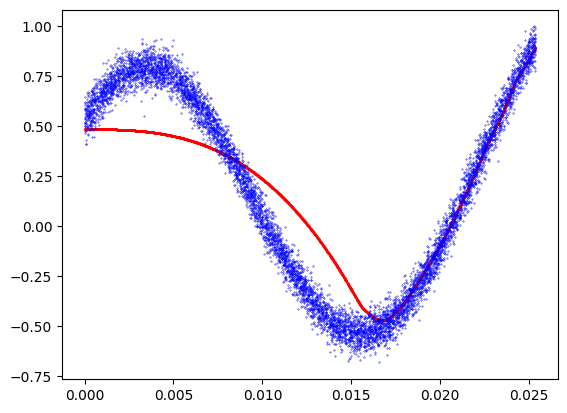

loss:  10.916625192079916 iteration:  210
loss:  10.912351728460349 iteration:  220
loss:  10.907538948201093 iteration:  230
loss:  10.901911219566445 iteration:  240
loss:  10.89599233288855 iteration:  250
loss:  10.889813604287973 iteration:  260
loss:  10.883730259629093 iteration:  270
loss:  10.878161760836678 iteration:  280
loss:  10.87302277240754 iteration:  290
loss:  10.868516340166838 iteration:  300
loss:  10.86444518834638 iteration:  310
loss:  10.860767490593634 iteration:  320
loss:  10.857291440664598 iteration:  330
loss:  10.8541187151984 iteration:  340
loss:  10.850931550352126 iteration:  350
loss:  10.847989734974389 iteration:  360
loss:  10.845098898202295 iteration:  370
loss:  10.84235614524635 iteration:  380
loss:  10.839497348198842 iteration:  390
loss:  10.836740575551284 iteration:  400


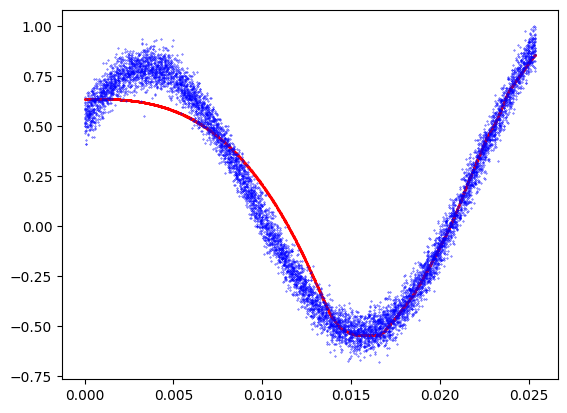

loss:  10.833848869801969 iteration:  410
loss:  10.831081019375766 iteration:  420
loss:  10.828389433000105 iteration:  430
loss:  10.825897917936087 iteration:  440
loss:  10.823495170969796 iteration:  450
loss:  10.821120795050948 iteration:  460
loss:  10.8189016690185 iteration:  470
loss:  10.816826886557802 iteration:  480
loss:  10.814924975879388 iteration:  490
loss:  10.813269539042675 iteration:  500
loss:  10.811846339512462 iteration:  510
loss:  10.81066149042493 iteration:  520
loss:  10.809664526859168 iteration:  530
loss:  10.808811890158358 iteration:  540
loss:  10.808108142665372 iteration:  550
loss:  10.807535773142645 iteration:  560
loss:  10.807042068640618 iteration:  570
loss:  10.806760954022955 iteration:  580
loss:  10.80662975176163 iteration:  590
loss:  10.806653081621622 iteration:  600


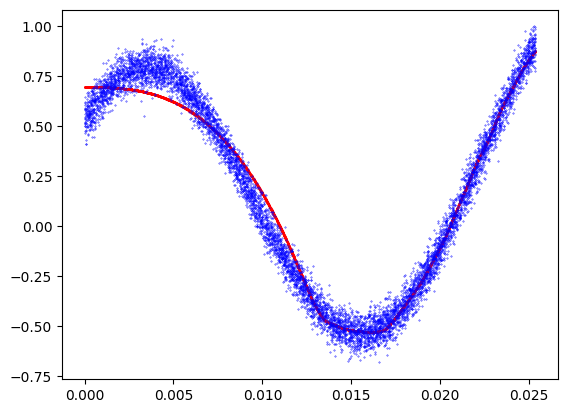

loss:  10.806714857208576 iteration:  610
loss:  10.80677593047012 iteration:  620
loss:  10.806948143642297 iteration:  630
loss:  10.807293365049826 iteration:  640
loss:  10.807664328331555 iteration:  650
loss:  10.80807074195275 iteration:  660
loss:  10.808545694948632 iteration:  670
loss:  10.809073857865963 iteration:  680
loss:  10.809715738066245 iteration:  690
loss:  10.81038574964432 iteration:  700
loss:  10.811007773239865 iteration:  710
loss:  10.811706606321321 iteration:  720
loss:  10.81244363604568 iteration:  730
loss:  10.813257562322713 iteration:  740
loss:  10.814056089512928 iteration:  750
loss:  10.814744934992387 iteration:  760
loss:  10.815477425083973 iteration:  770
loss:  10.816236582141547 iteration:  780
loss:  10.817036163111283 iteration:  790
loss:  10.817898257057536 iteration:  800


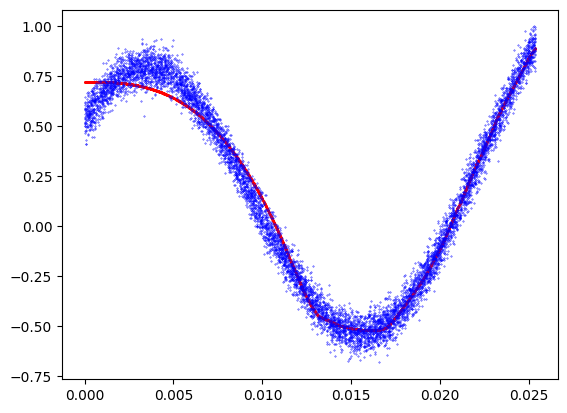

loss:  10.818804737511739 iteration:  810
loss:  10.819730562309157 iteration:  820
loss:  10.820674839376206 iteration:  830
loss:  10.821650098585547 iteration:  840
loss:  10.822707046717946 iteration:  850
loss:  10.823709038450117 iteration:  860
loss:  10.824739917091621 iteration:  870
loss:  10.825789539600159 iteration:  880
loss:  10.826792542779769 iteration:  890
loss:  10.827692704047584 iteration:  900
loss:  10.82842835117861 iteration:  910
loss:  10.828767995573 iteration:  920
loss:  10.828063685339252 iteration:  930
loss:  10.824498042259735 iteration:  940
loss:  10.813084110290852 iteration:  950
loss:  10.78127883950273 iteration:  960
loss:  10.72250842573241 iteration:  970
loss:  10.675438659927707 iteration:  980
loss:  10.656599945425123 iteration:  990
loss:  10.651296207695994 iteration:  1000


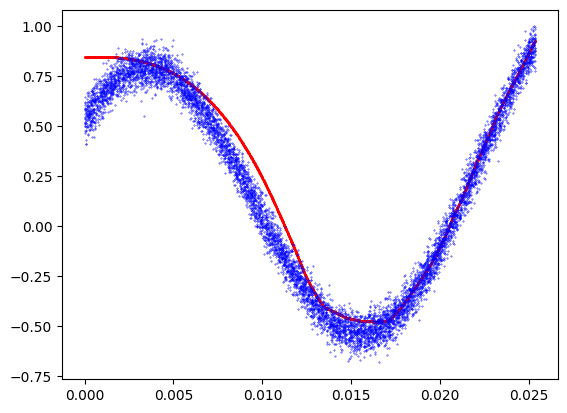

loss:  10.650573475019808 iteration:  1010
loss:  10.651064147944078 iteration:  1020
loss:  10.651744375207574 iteration:  1030
loss:  10.652287589573465 iteration:  1040
loss:  10.652597908102049 iteration:  1050
loss:  10.652638290077235 iteration:  1060
loss:  10.65241826218322 iteration:  1070
loss:  10.651891361479736 iteration:  1080
loss:  10.651031556957554 iteration:  1090
loss:  10.649882761554581 iteration:  1100
loss:  10.648141728294227 iteration:  1110
loss:  10.643559223885195 iteration:  1120
loss:  10.643289755315124 iteration:  1130
loss:  10.643061764932295 iteration:  1140
loss:  10.642806063848946 iteration:  1150
loss:  10.642478116904176 iteration:  1160
loss:  10.642071343232466 iteration:  1170
loss:  10.641575516539836 iteration:  1180
loss:  10.640947645202132 iteration:  1190
loss:  10.640103702533734 iteration:  1200


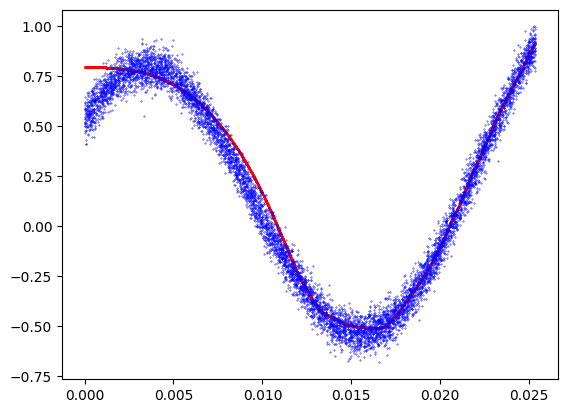

loss:  10.639025170830733 iteration:  1210
loss:  10.637694743472597 iteration:  1220
loss:  10.63613441213182 iteration:  1230
loss:  10.634244721922466 iteration:  1240
loss:  10.632076716152277 iteration:  1250
loss:  10.62956512929484 iteration:  1260
loss:  10.626866463806818 iteration:  1270
loss:  10.62398773804932 iteration:  1280
loss:  10.620961331618059 iteration:  1290
loss:  10.617916249996075 iteration:  1300
loss:  10.6149587305957 iteration:  1310
loss:  10.612154541913197 iteration:  1320
loss:  10.60959219943331 iteration:  1330
loss:  10.607258729651297 iteration:  1340
loss:  10.6052696507432 iteration:  1350
loss:  10.603518983613451 iteration:  1360
loss:  10.602040681692973 iteration:  1370
loss:  10.600751421409544 iteration:  1380
loss:  10.599627755072017 iteration:  1390
loss:  10.598627679070429 iteration:  1400


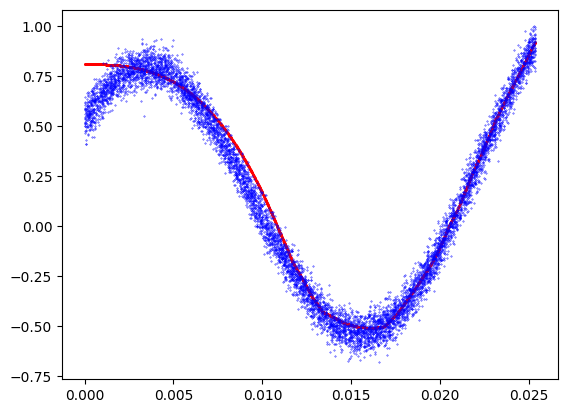

loss:  10.597706648292816 iteration:  1410
loss:  10.596825088310425 iteration:  1420
loss:  10.596027897009243 iteration:  1430
loss:  10.595302331487813 iteration:  1440
loss:  10.594587758639278 iteration:  1450
loss:  10.593856417284602 iteration:  1460
loss:  10.593079049366006 iteration:  1470
loss:  10.592294692317404 iteration:  1480
loss:  10.591560401029898 iteration:  1490
loss:  10.590777405648009 iteration:  1500
loss:  10.589996667373645 iteration:  1510
loss:  10.589180308950532 iteration:  1520
loss:  10.588280873680338 iteration:  1530
loss:  10.587315837248838 iteration:  1540
loss:  10.58632369211817 iteration:  1550
loss:  10.58528574773181 iteration:  1560
loss:  10.584255471950302 iteration:  1570
loss:  10.583211063834957 iteration:  1580
loss:  10.582129020999128 iteration:  1590
loss:  10.58100919827969 iteration:  1600


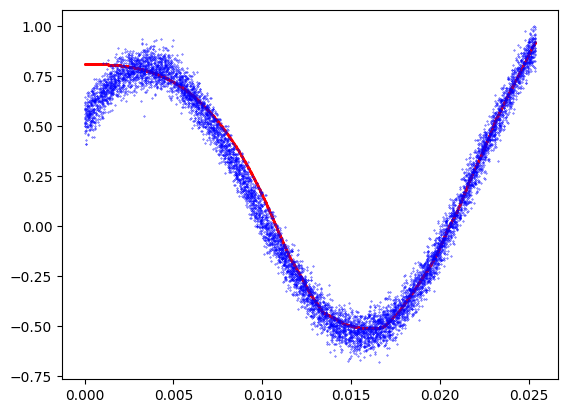

loss:  10.57993674468502 iteration:  1610
loss:  10.578872545601094 iteration:  1620
loss:  10.577807677690114 iteration:  1630
loss:  10.576731787219 iteration:  1640
loss:  10.575675104870756 iteration:  1650
loss:  10.574639378317357 iteration:  1660
loss:  10.57364280307947 iteration:  1670
loss:  10.572631961083049 iteration:  1680
loss:  10.57168439933033 iteration:  1690
loss:  10.570776879194254 iteration:  1700
loss:  10.569885325308228 iteration:  1710
loss:  10.569043058086113 iteration:  1720
loss:  10.568258755918267 iteration:  1730
loss:  10.567478574009842 iteration:  1740
loss:  10.56671781626245 iteration:  1750
loss:  10.565974030569176 iteration:  1760
loss:  10.565257503486844 iteration:  1770
loss:  10.564561288990301 iteration:  1780
loss:  10.56391333750611 iteration:  1790
loss:  10.563305534253399 iteration:  1800


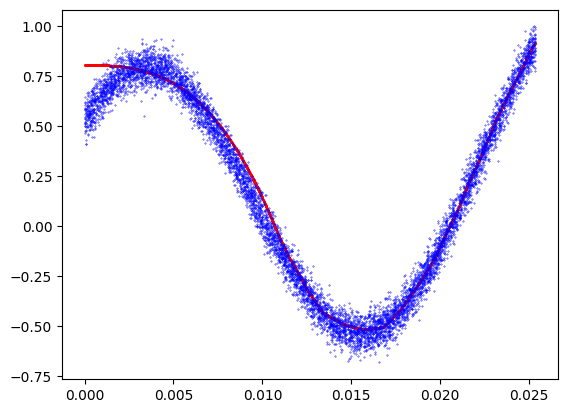

loss:  10.56272578213366 iteration:  1810
loss:  10.56217181469806 iteration:  1820
loss:  10.561624564168161 iteration:  1830
loss:  10.561080902658023 iteration:  1840
loss:  10.560568357346204 iteration:  1850
loss:  10.56009556707335 iteration:  1860
loss:  10.55960810068547 iteration:  1870
loss:  10.559113961808164 iteration:  1880
loss:  10.55862302084978 iteration:  1890
loss:  10.558149123466272 iteration:  1900
loss:  10.557726005062548 iteration:  1910
loss:  10.55727375761125 iteration:  1920
loss:  10.556850678506915 iteration:  1930
loss:  10.556442108774133 iteration:  1940
loss:  10.5560067250491 iteration:  1950
loss:  10.55562706143366 iteration:  1960
loss:  10.555318632508579 iteration:  1970
loss:  10.555004559777554 iteration:  1980
loss:  10.554675489607673 iteration:  1990
loss:  10.554369672322553 iteration:  2000


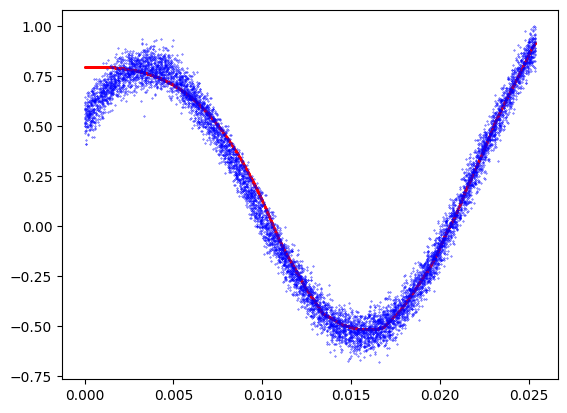

loss:  10.554039054134506 iteration:  2010
loss:  10.55369295172039 iteration:  2020
loss:  10.553338715650932 iteration:  2030
loss:  10.553012493413783 iteration:  2040
loss:  10.552731678873277 iteration:  2050
loss:  10.552463445463669 iteration:  2060
loss:  10.552179951905872 iteration:  2070
loss:  10.551881967764965 iteration:  2080
loss:  10.551557080630184 iteration:  2090
loss:  10.551252751418804 iteration:  2100
loss:  10.550909900047905 iteration:  2110
loss:  10.55045943582933 iteration:  2120
loss:  10.549999242317467 iteration:  2130
loss:  10.549511594006777 iteration:  2140
loss:  10.548964450979545 iteration:  2150
loss:  10.548426622140939 iteration:  2160
loss:  10.547914810363789 iteration:  2170
loss:  10.547419045535866 iteration:  2180
loss:  10.546934222639175 iteration:  2190
loss:  10.54645059252868 iteration:  2200


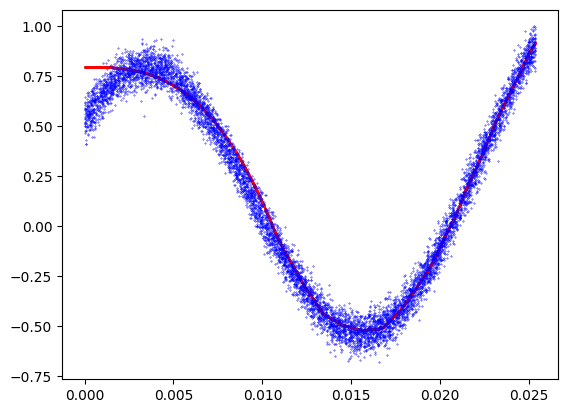

loss:  10.545961574597767 iteration:  2210
loss:  10.545447625202355 iteration:  2220
loss:  10.544879572952153 iteration:  2230
loss:  10.544362814133214 iteration:  2240
loss:  10.543852021224051 iteration:  2250
loss:  10.543316890555266 iteration:  2260
loss:  10.54278164203581 iteration:  2270
loss:  10.542257295054702 iteration:  2280
loss:  10.541752147490964 iteration:  2290
loss:  10.541248863126247 iteration:  2300
loss:  10.54073491949906 iteration:  2310
loss:  10.54022735868857 iteration:  2320
loss:  10.539766172031966 iteration:  2330
loss:  10.539323301939193 iteration:  2340
loss:  10.538859152221505 iteration:  2350
loss:  10.538417932054772 iteration:  2360
loss:  10.537981703274777 iteration:  2370
loss:  10.537509307699379 iteration:  2380
loss:  10.537006150859145 iteration:  2390
loss:  10.536535979310578 iteration:  2400


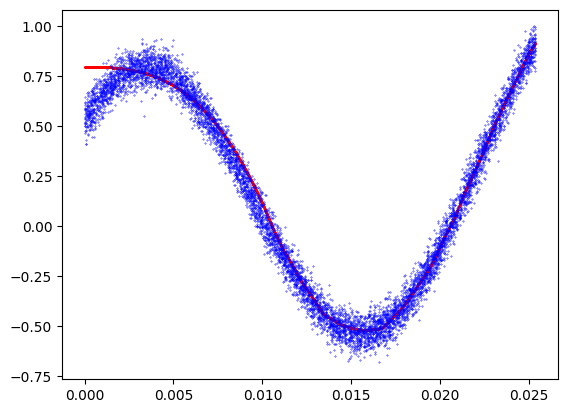

loss:  10.536075638772534 iteration:  2410
loss:  10.535548559142438 iteration:  2420
loss:  10.535064596100147 iteration:  2430
loss:  10.534585188219248 iteration:  2440
loss:  10.534063884557977 iteration:  2450
loss:  10.533534912346507 iteration:  2460
loss:  10.533000855054164 iteration:  2470
loss:  10.532480427726176 iteration:  2480
loss:  10.531998052817311 iteration:  2490
loss:  10.53151373322517 iteration:  2500
loss:  10.531068536562906 iteration:  2510
loss:  10.530639583465037 iteration:  2520
loss:  10.53021272215307 iteration:  2530
loss:  10.529759447741053 iteration:  2540
loss:  10.529332839908191 iteration:  2550
loss:  10.528932614502889 iteration:  2560
loss:  10.528539358879149 iteration:  2570
loss:  10.528157082865642 iteration:  2580
loss:  10.527789843391409 iteration:  2590
loss:  10.527463870198776 iteration:  2600


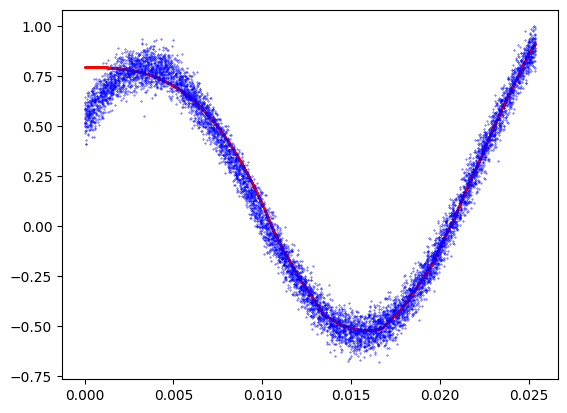

loss:  10.527186256629129 iteration:  2610
loss:  10.526928213955317 iteration:  2620
loss:  10.526657800435254 iteration:  2630
loss:  10.526369761085833 iteration:  2640
loss:  10.526097155752408 iteration:  2650
loss:  10.525834335414245 iteration:  2660
loss:  10.52559535451595 iteration:  2670
loss:  10.525387152546994 iteration:  2680
loss:  10.525171872282838 iteration:  2690
loss:  10.524975448623035 iteration:  2700
loss:  10.52481095713163 iteration:  2710
loss:  10.524640553512052 iteration:  2720
loss:  10.524472054884328 iteration:  2730
loss:  10.524342416142904 iteration:  2740
loss:  10.524208767697672 iteration:  2750
loss:  10.524029602086085 iteration:  2760
loss:  10.523869057079787 iteration:  2770
loss:  10.523680322416476 iteration:  2780
loss:  10.523489092981844 iteration:  2790
loss:  10.523297760068157 iteration:  2800


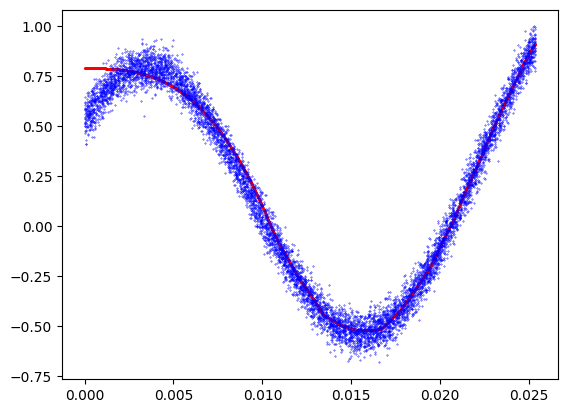

loss:  10.523092591662065 iteration:  2810
loss:  10.522865017922882 iteration:  2820
loss:  10.522638062843901 iteration:  2830
loss:  10.522413312729567 iteration:  2840
loss:  10.52217864170056 iteration:  2850
loss:  10.521923919538004 iteration:  2860
loss:  10.521653954655731 iteration:  2870
loss:  10.521348912160843 iteration:  2880
loss:  10.521047469417804 iteration:  2890
loss:  10.520731959538155 iteration:  2900
loss:  10.520436164477958 iteration:  2910
loss:  10.52015601131543 iteration:  2920
loss:  10.519853091562315 iteration:  2930
loss:  10.519551823771533 iteration:  2940
loss:  10.519231284943983 iteration:  2950
loss:  10.51890878940648 iteration:  2960
loss:  10.518596651714523 iteration:  2970
loss:  10.518259225663014 iteration:  2980
loss:  10.517904754974518 iteration:  2990
loss:  10.517559406968969 iteration:  3000


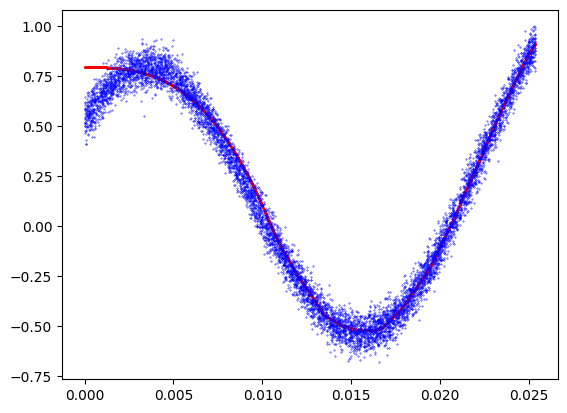

loss:  10.517227219954155 iteration:  3010
loss:  10.516888237493676 iteration:  3020
loss:  10.51655016843893 iteration:  3030
loss:  10.516226044716738 iteration:  3040
loss:  10.515927143592945 iteration:  3050
loss:  10.515654600963051 iteration:  3060
loss:  10.515396227216259 iteration:  3070
loss:  10.515121829204421 iteration:  3080
loss:  10.51487566854572 iteration:  3090
loss:  10.514640073974594 iteration:  3100
loss:  10.514393602122635 iteration:  3110
loss:  10.514172927363449 iteration:  3120
loss:  10.513958502491466 iteration:  3130
loss:  10.513768736246538 iteration:  3140
loss:  10.513597443428127 iteration:  3150
loss:  10.513440467795695 iteration:  3160
loss:  10.513298531133488 iteration:  3170
loss:  10.513178747623932 iteration:  3180
loss:  10.513061474207687 iteration:  3190
loss:  10.512954975582362 iteration:  3200


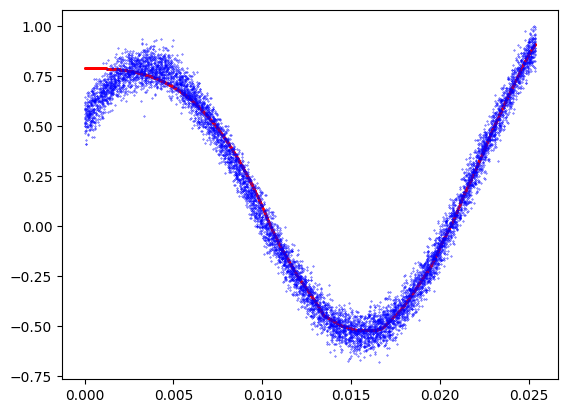

loss:  10.51287398058345 iteration:  3210
loss:  10.512770119164932 iteration:  3220
loss:  10.512654739404708 iteration:  3230
loss:  10.512527594976444 iteration:  3240
loss:  10.51240568402236 iteration:  3250
loss:  10.512304710805212 iteration:  3260
loss:  10.512202599421157 iteration:  3270
loss:  10.512099033257595 iteration:  3280
loss:  10.511999949909443 iteration:  3290
loss:  10.511896414152613 iteration:  3300
loss:  10.511796184675456 iteration:  3310
loss:  10.511683032362754 iteration:  3320
loss:  10.511576402303545 iteration:  3330
loss:  10.511481476723496 iteration:  3340
loss:  10.511394319322864 iteration:  3350
loss:  10.511291934048074 iteration:  3360
loss:  10.51118575050519 iteration:  3370
loss:  10.51110054566877 iteration:  3380
loss:  10.51102350054707 iteration:  3390
loss:  10.51096298261926 iteration:  3400


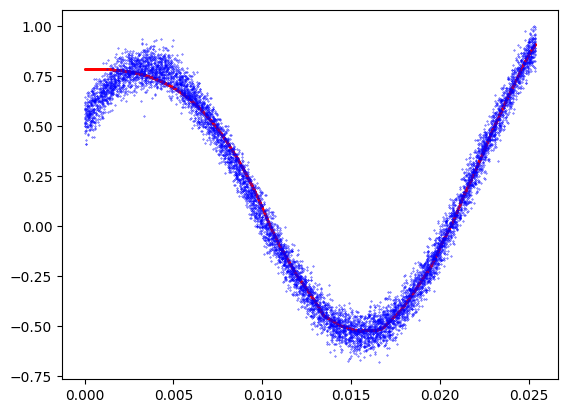

loss:  10.510891476432075 iteration:  3410
loss:  10.510830237458508 iteration:  3420
loss:  10.51074695489197 iteration:  3430
loss:  10.510670473752723 iteration:  3440
loss:  10.510614412229721 iteration:  3450
loss:  10.510550309553228 iteration:  3460
loss:  10.510461907924222 iteration:  3470
loss:  10.510383373363842 iteration:  3480
loss:  10.51030344665338 iteration:  3490
loss:  10.510217702300645 iteration:  3500
loss:  10.510129196081389 iteration:  3510
loss:  10.510053149554357 iteration:  3520
loss:  10.509969538979094 iteration:  3530
loss:  10.509883070122287 iteration:  3540
loss:  10.509790965129868 iteration:  3550
loss:  10.509697243027228 iteration:  3560
loss:  10.509600996511715 iteration:  3570
loss:  10.509509835528617 iteration:  3580
loss:  10.509404517093236 iteration:  3590
loss:  10.509300415756035 iteration:  3600


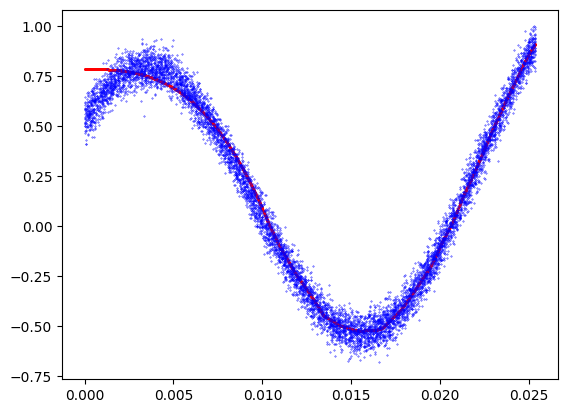

loss:  10.509204064591145 iteration:  3610
loss:  10.509117835511487 iteration:  3620
loss:  10.50902530453681 iteration:  3630
loss:  10.50892406766327 iteration:  3640
loss:  10.508815767846786 iteration:  3650
loss:  10.50871252577334 iteration:  3660
loss:  10.508606622136355 iteration:  3670
loss:  10.508498553319843 iteration:  3680
loss:  10.508391440861702 iteration:  3690
loss:  10.508279082762462 iteration:  3700
loss:  10.508141280931815 iteration:  3710
loss:  10.507993245747283 iteration:  3720
loss:  10.50784345316411 iteration:  3730
loss:  10.507685348216315 iteration:  3740
loss:  10.507529290576441 iteration:  3750
loss:  10.507360798600152 iteration:  3760
loss:  10.507199833972109 iteration:  3770
loss:  10.507037464246263 iteration:  3780
loss:  10.506864356410581 iteration:  3790
loss:  10.506677151463771 iteration:  3800


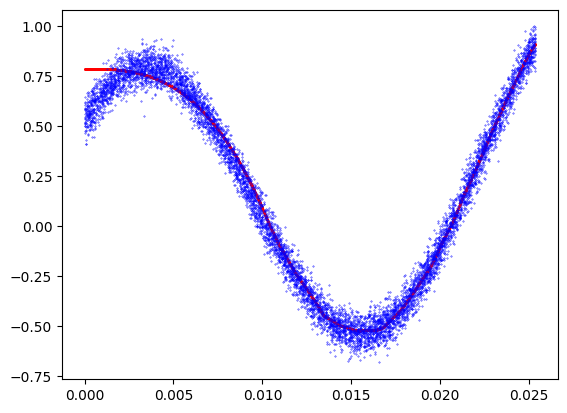

loss:  10.506480229442143 iteration:  3810
loss:  10.506293299860864 iteration:  3820
loss:  10.50609715791888 iteration:  3830
loss:  10.505895019560315 iteration:  3840
loss:  10.505691119069406 iteration:  3850
loss:  10.505484614403487 iteration:  3860
loss:  10.505284342191056 iteration:  3870
loss:  10.505077110949804 iteration:  3880
loss:  10.504873355081754 iteration:  3890
loss:  10.50469041537817 iteration:  3900
loss:  10.50451825644408 iteration:  3910
loss:  10.504354884884146 iteration:  3920
loss:  10.504197083333281 iteration:  3930
loss:  10.504030101491704 iteration:  3940
loss:  10.503866341010873 iteration:  3950
loss:  10.503703125032692 iteration:  3960
loss:  10.503544544054572 iteration:  3970
loss:  10.503383626011567 iteration:  3980
loss:  10.503233585433033 iteration:  3990
loss:  10.503086123380571 iteration:  4000


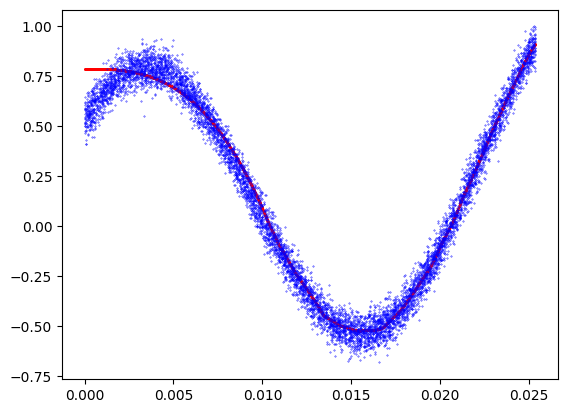

loss:  10.502950271443575 iteration:  4010
loss:  10.502815681071304 iteration:  4020
loss:  10.502689531091512 iteration:  4030
loss:  10.502563225925751 iteration:  4040
loss:  10.502439575795217 iteration:  4050
loss:  10.502325583705971 iteration:  4060
loss:  10.50221053527125 iteration:  4070
loss:  10.502098241681262 iteration:  4080
loss:  10.50200204902351 iteration:  4090
loss:  10.501918893587389 iteration:  4100
loss:  10.501844436920772 iteration:  4110
loss:  10.501771236856017 iteration:  4120
loss:  10.50170610718286 iteration:  4130
loss:  10.501642687172646 iteration:  4140
loss:  10.501572497435934 iteration:  4150
loss:  10.501490164423771 iteration:  4160
loss:  10.501403641261772 iteration:  4170
loss:  10.50131996727162 iteration:  4180
loss:  10.501244027615455 iteration:  4190
loss:  10.501211995246429 iteration:  4200


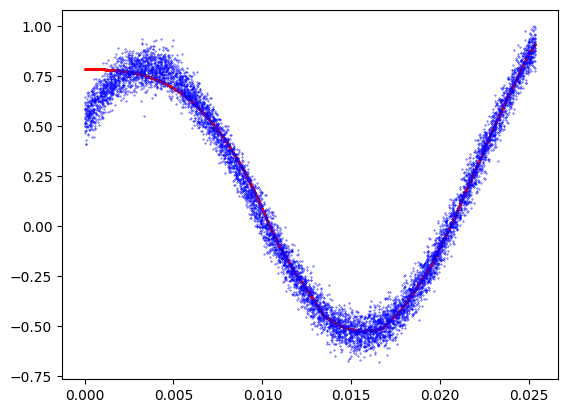

loss:  10.501197938428179 iteration:  4210
loss:  10.501179757379525 iteration:  4220
loss:  10.501180300149741 iteration:  4230
loss:  10.501193655460762 iteration:  4240
loss:  10.501213882462036 iteration:  4250
loss:  10.50123609083306 iteration:  4260
loss:  10.501241398672125 iteration:  4270
loss:  10.501237966852633 iteration:  4280
loss:  10.501246939988452 iteration:  4290
loss:  10.501263034141322 iteration:  4300
loss:  10.501268583582355 iteration:  4310
loss:  10.501276979821515 iteration:  4320
loss:  10.501282236102002 iteration:  4330
loss:  10.50129405591087 iteration:  4340
loss:  10.501290445256846 iteration:  4350
loss:  10.501283322429424 iteration:  4360
loss:  10.501282104588958 iteration:  4370
loss:  10.501279673552162 iteration:  4380
loss:  10.501271295268598 iteration:  4390
loss:  10.501275246907358 iteration:  4400


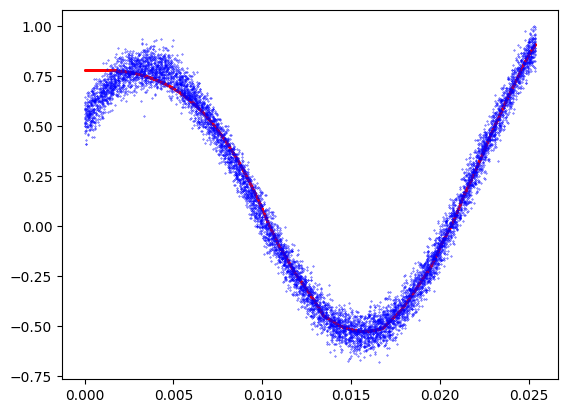

loss:  10.50128245728864 iteration:  4410
loss:  10.50129125708271 iteration:  4420
loss:  10.501290755332342 iteration:  4430
loss:  10.501301458891497 iteration:  4440
loss:  10.501308361729212 iteration:  4450
loss:  10.501307472141988 iteration:  4460
loss:  10.501298385331252 iteration:  4470
loss:  10.501280657390778 iteration:  4480
loss:  10.501261323991839 iteration:  4490
loss:  10.501241009518504 iteration:  4500
loss:  10.501218953722464 iteration:  4510
loss:  10.501205765615612 iteration:  4520
loss:  10.501181989454274 iteration:  4530
loss:  10.501146545971247 iteration:  4540
loss:  10.501120311323959 iteration:  4550
loss:  10.501094010514608 iteration:  4560
loss:  10.50106697813447 iteration:  4570
loss:  10.501031639120463 iteration:  4580
loss:  10.500993354139148 iteration:  4590
loss:  10.500948965642134 iteration:  4600


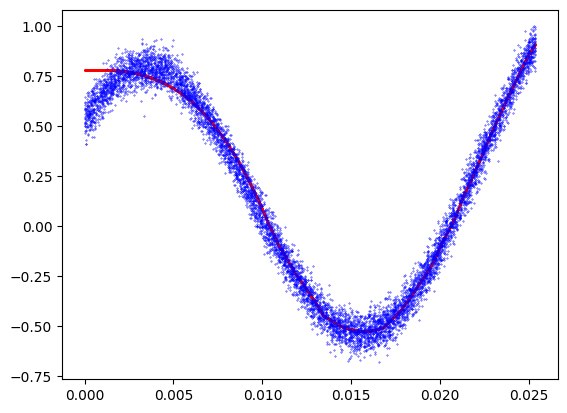

loss:  10.500900374057165 iteration:  4610
loss:  10.500850006907495 iteration:  4620
loss:  10.50079634596245 iteration:  4630
loss:  10.500748477115765 iteration:  4640
loss:  10.50070531240994 iteration:  4650
loss:  10.500657875767406 iteration:  4660
loss:  10.500608983530872 iteration:  4670
loss:  10.500551968467379 iteration:  4680
loss:  10.500493177321212 iteration:  4690
loss:  10.500431807120853 iteration:  4700
loss:  10.500377205175663 iteration:  4710
loss:  10.500332114676798 iteration:  4720
loss:  10.500299126737366 iteration:  4730
loss:  10.500266880438941 iteration:  4740
loss:  10.500238472803948 iteration:  4750
loss:  10.500216606031971 iteration:  4760
loss:  10.500203560103657 iteration:  4770
loss:  10.500200680086529 iteration:  4780
loss:  10.500205780822991 iteration:  4790
loss:  10.500211365428749 iteration:  4800


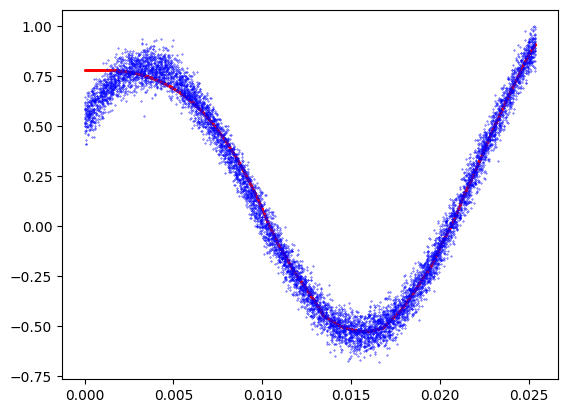

loss:  10.500220908891414 iteration:  4810
loss:  10.500233540460652 iteration:  4820
loss:  10.500238100031943 iteration:  4830
loss:  10.500246813416812 iteration:  4840
loss:  10.500261589744342 iteration:  4850
loss:  10.500286421583258 iteration:  4860
loss:  10.500315979202698 iteration:  4870
loss:  10.500342026389566 iteration:  4880
loss:  10.500365776876794 iteration:  4890
loss:  10.500392434108754 iteration:  4900
loss:  10.500414161775772 iteration:  4910
loss:  10.500435088030269 iteration:  4920
loss:  10.500450329435155 iteration:  4930
loss:  10.500465899050946 iteration:  4940
loss:  10.50047737520526 iteration:  4950
loss:  10.500484088070396 iteration:  4960
loss:  10.500482810690949 iteration:  4970
loss:  10.500478762092836 iteration:  4980
loss:  10.50047223760839 iteration:  4990


In [70]:
A5 = gradient_descent(X_train, Y_train, 0.03, 5000)